#  Reordering and Plotting a Confusion Matrix
This code visualizes a confusion matrix by first reordering its rows and columns to group similar categories more intuitively. It uses matplotlib and seaborn to create a heatmap that shows the relationship between predicted and actual classes.

Reordered confusion matrix:
[[70 15  0  1]
 [14 58 10  4]
 [ 3 16 50 22]
 [ 0  0 25 68]]

Reordered labels:
['Fatty predominance', 'Scattered areas \n of fibriglandular \n density', 'Heterogeneoulsy \n dense', 'Extremely dense']


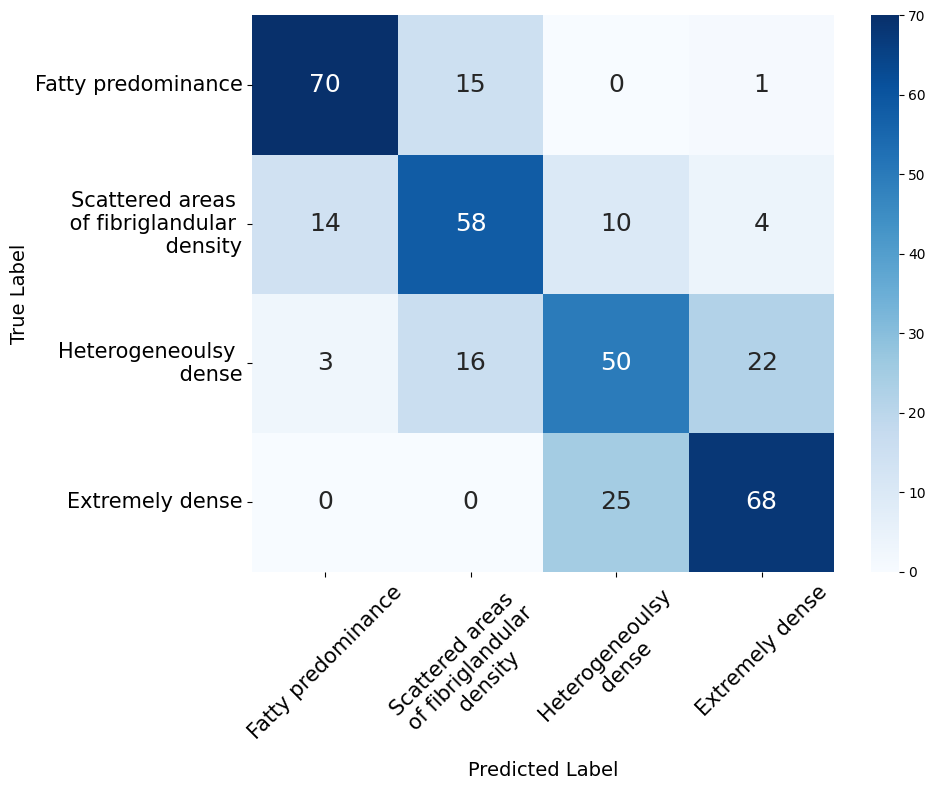

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Original confusion matrix and labels
cm_original = np.array([
        [58,4,14,10],
        [0,68,0,25],
        [15,1,70,0],
        [16,22,3,50]
    
])

labels_original = [
    'Scattered areas \n of fibriglandular \n density',
    'Extremely dense', 
    'Fatty predominance',
    'Heterogeneoulsy \n dense'
]

# Define the new order mapping
# Original indices: Scattered=0, Extremely=1, Fatty=2, Heterogeneously=3
# Desired order: Fatty=2, Scattered=0, Heterogeneously=3, Extremely=1
order = [2, 0, 3, 1]

# Reorder matrix 
cm_reordered = cm_original[order][:, order]

# Reorder labels
labels_reordered = [labels_original[i] for i in order]

print("Reordered confusion matrix:")
print(cm_reordered)
print("\nReordered labels:")
print(labels_reordered)

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(cm_reordered, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels_reordered, yticklabels=labels_reordered,
            annot_kws={"size": 18})  # font size of the annotations

plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.xticks(fontsize=15, rotation=45)
plt.yticks(fontsize=15, rotation=0)
plt.tight_layout()
plt.show()


# Bootstrap Confidence Intervals for Model Evaluation
Compute bootstrap-based confidence intervals for accuracy and F1-score using a confusion matrix.


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, f1_score

def confusion_matrix_to_predictions(cm, labels):
    """
    Converts a confusion matrix back into predicted and true label arrays
    """
    y_true = []
    y_pred = []
    
    for i, true_class in enumerate(labels):
        for j, pred_class in enumerate(labels):
            count = cm[i][j]
            # Add 'count' number of predictions where true=i, pred=j
            y_true.extend([i] * count)
            y_pred.extend([j] * count)
    
    return np.array(y_true), np.array(y_pred)

def bootstrap_ci_from_cm(cm, labels, n_bootstrap=1000, confidence_level=0.95):
    """
    Runs a bootstrap simulation to estimate the confidence intervals (CIs) for accuracy and F1-score
    """
    # Convert confusion matrix to individual predictions
    y_true, y_pred = confusion_matrix_to_predictions(cm, labels)
    
    n_samples = len(y_true)
    accuracies = []
    f1_scores = []
    
    np.random.seed(42)  # for reproducibility
    
    print(f"Total samples: {n_samples}")
    print("Calculating bootstrap confidence intervals...")
    
    for i in range(n_bootstrap):
        if (i + 1) % 200 == 0:
            print(f"Bootstrap iteration: {i + 1}/{n_bootstrap}")
            
        # Bootstrap sample with replacement
        indices = np.random.choice(n_samples, size=n_samples, replace=True)
        y_true_boot = y_true[indices]
        y_pred_boot = y_pred[indices]
        
        # Calculate metrics
        acc = accuracy_score(y_true_boot, y_pred_boot)
        f1 = f1_score(y_true_boot, y_pred_boot, average='macro', zero_division=0)
        
        accuracies.append(acc)
        f1_scores.append(f1)
    
    # Calculate confidence intervals
    alpha = 1 - confidence_level
    acc_lower = np.percentile(accuracies, (alpha/2) * 100)
    acc_upper = np.percentile(accuracies, (1 - alpha/2) * 100)
    f1_lower = np.percentile(f1_scores, (alpha/2) * 100)
    f1_upper = np.percentile(f1_scores, (1 - alpha/2) * 100)
    
    # Calculate original metrics
    original_acc = accuracy_score(y_true, y_pred)
    original_f1 = f1_score(y_true, y_pred, average='macro', zero_division=0)
    
    return {
        'accuracy': original_acc,
        'accuracy_ci': (acc_lower, acc_upper),
        'f1_score': original_f1,
        'f1_ci': (f1_lower, f1_upper),
        'bootstrap_accuracies': accuracies,
        'bootstrap_f1s': f1_scores
    }

def print_results(results, model_name="Model"):
    """
    Pretty-prints accuracy and F1-score with confidence intervals.
    """
    print(f"\n=== {model_name} Results ===")
    print(f"Accuracy: {results['accuracy']:.3f} (95% CI: {results['accuracy_ci'][0]:.3f}-{results['accuracy_ci'][1]:.3f})")
    print(f"F1-Score: {results['f1_score']:.3f} (95% CI: {results['f1_ci'][0]:.3f}-{results['f1_ci'][1]:.3f})")

if __name__ == "__main__":
    cm = [
        [58,4,14,10],
        [0,68,0,25],
        [15,1,70,0],
        [16,22,3,50]
    ]
    
    # Class labels
    labels = [
        'Scattered areas of fibriglandular density', 
        'Extremely dense', 
        'Fatty predominance', 
        'Heterogeneoulsy dense'
    ]
    
    # Calculate bootstrap confidence intervals
    results = bootstrap_ci_from_cm(cm, labels, n_bootstrap=1000)
    
    # Print results
    print_results(results, "C")
    
    # Additional analysis
    print(f"\nBootstrap Statistics:")
    print(f"Accuracy std: {np.std(results['bootstrap_accuracies']):.4f}")
    print(f"F1-Score std: {np.std(results['bootstrap_f1s']):.4f}")
    
   

Total samples: 356
Calculating bootstrap confidence intervals...
Bootstrap iteration: 200/1000
Bootstrap iteration: 400/1000
Bootstrap iteration: 600/1000
Bootstrap iteration: 800/1000
Bootstrap iteration: 1000/1000

=== C Results ===
Accuracy: 0.691 (95% CI: 0.640-0.736)
F1-Score: 0.691 (95% CI: 0.642-0.734)

Bootstrap Statistics:
Accuracy std: 0.0242
F1-Score std: 0.0236


# Training Curve Analysis and Visualization
Loading, analyzing, and visualizing model training data from CSV files. The CSV files were downloaded from tensorboard.

Experiment 12: ConvNeXt + FT, 4-class, balanced - Min: 0.0348, Max: 1.3937
Experiment 12: ConvNeXt + FT, 4-class, balanced - Step Range: 18 to 873
Experiment 9: BiomedCLIP + LP, 4-class, balanced - Min: 1.0040, Max: 3.4929
Experiment 9: BiomedCLIP + LP, 4-class, balanced - Step Range: 17 to 1997
Experiment 9: BiomedCLIP + LP, 4-class, balanced - Points removed: 89 out of 200 (44.5%)
Experiment 4: BiomedCLIP + LP, 5-class, balanced + aug  - Min: 1.4456, Max: 8.1183
Experiment 4: BiomedCLIP + LP, 5-class, balanced + aug  - Step Range: 6 to 1399


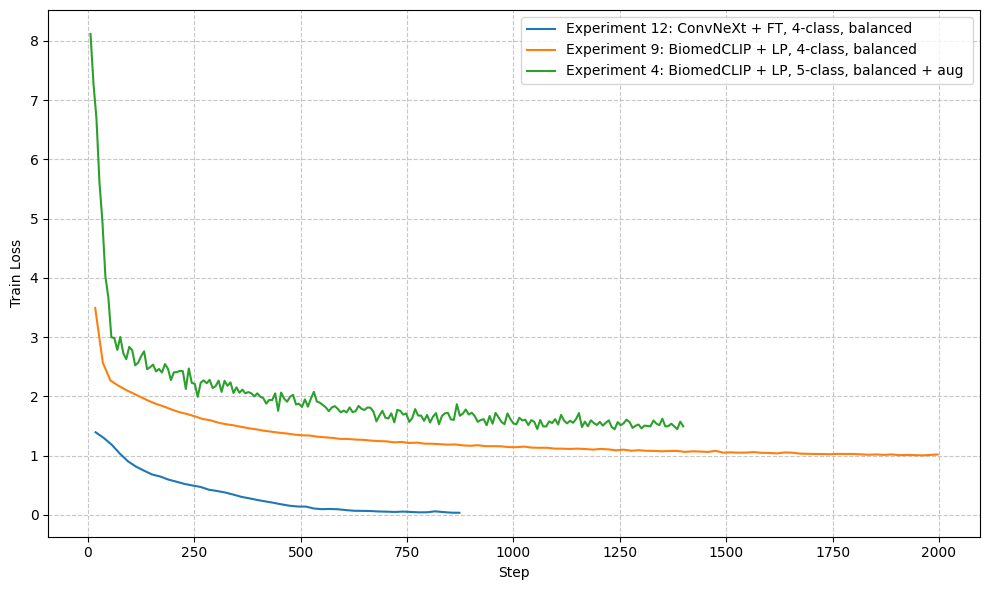


Summary Statistics:
                                                    count  original_count  \
Experiment 12: ConvNeXt + FT, 4-class, balanced      46.0            46.0   
Experiment 9: BiomedCLIP + LP, 4-class, balanced    111.0           200.0   
Experiment 4: BiomedCLIP + LP, 5-class, balance...  200.0           200.0   

                                                    filtered_out  min_value  \
Experiment 12: ConvNeXt + FT, 4-class, balanced              0.0   0.034780   
Experiment 9: BiomedCLIP + LP, 4-class, balanced            89.0   1.004042   
Experiment 4: BiomedCLIP + LP, 5-class, balance...           0.0   1.445571   

                                                    max_value  mean_value  \
Experiment 12: ConvNeXt + FT, 4-class, balanced      1.393748    0.347093   
Experiment 9: BiomedCLIP + LP, 4-class, balanced     3.492878    1.281947   
Experiment 4: BiomedCLIP + LP, 5-class, balance...   8.118347    1.990005   

                                            

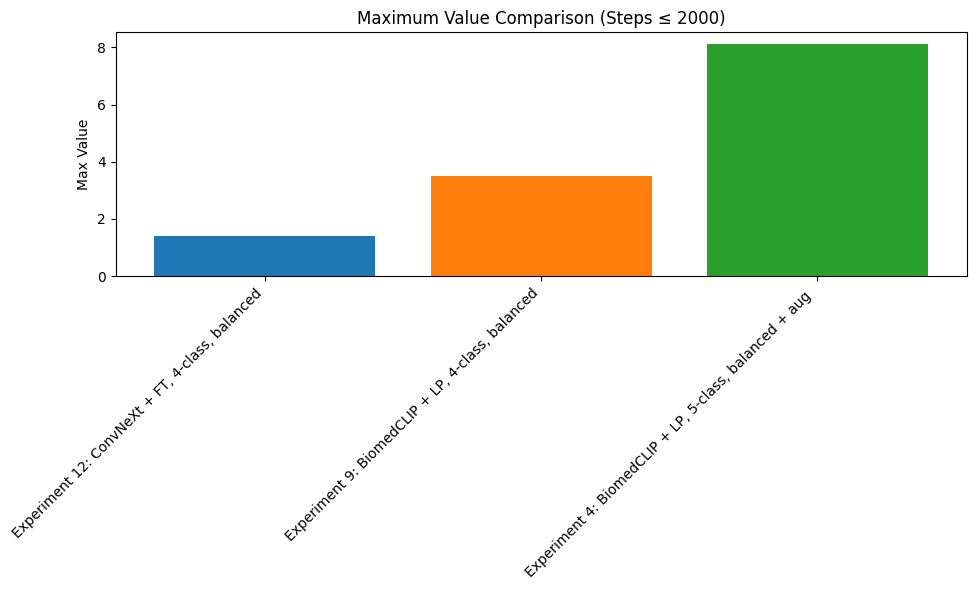

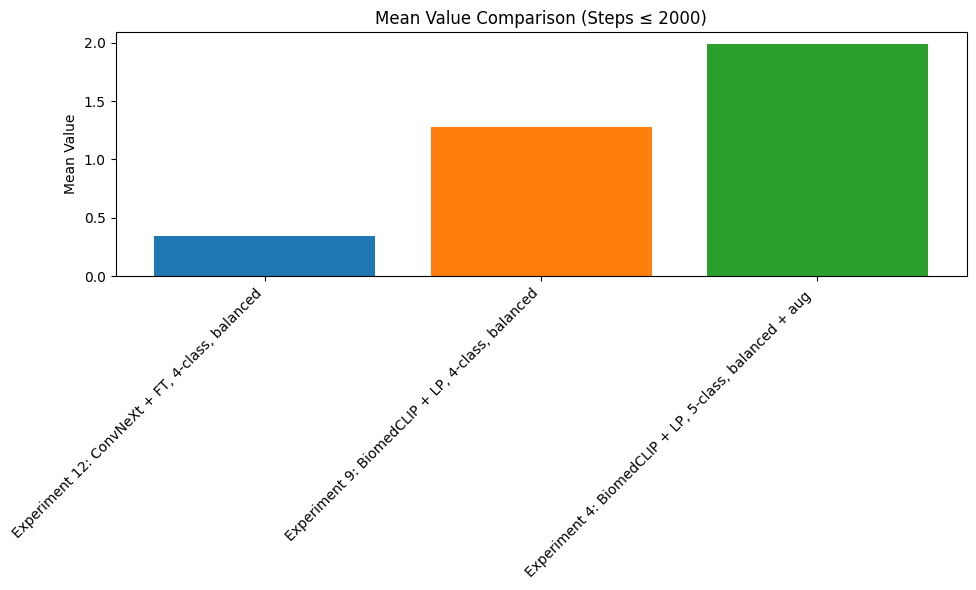

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def load_and_filter_data(file_paths, base_path, max_step=None):
    """
    Load CSV files and optionally filter by max step
    """
    datasets = []
    for file_path in file_paths:
        df = pd.read_csv(os.path.join(base_path, file_path))
        original_count = len(df)
        
        if max_step is not None:
            df = df[df['Step'] <= max_step]
        
        datasets.append({
            'data': df,
            'original_count': original_count,
            'filtered_count': len(df),
            'filtered_out': original_count - len(df)
        })
    
    return datasets

def calculate_stats(datasets, labels):
    """
    Computes descriptive statistics (mean, std, min, max) for each dataset's Value column (e.g., loss)
    """
    stats = {}
    for dataset, label in zip(datasets, labels):
        df = dataset['data']
        stats[label] = {
            'count': dataset['filtered_count'],
            'original_count': dataset['original_count'],
            'filtered_out': dataset['filtered_out'],
            'min_value': df['Value'].min(),
            'max_value': df['Value'].max(),
            'mean_value': df['Value'].mean(),
            'std_value': df['Value'].std()
        }
    return stats

def plot_training_curves(datasets, labels, colors, max_step=None):
    """
    Plots the training loss curves for each model
    """
    plt.figure(figsize=(10, 6))
    
    for i, (dataset, label) in enumerate(zip(datasets, labels)):
        df = dataset['data']
        color = colors[i % len(colors)]
        
        plt.plot(df['Step'], df['Value'], label=label, color=color)
        
        # Print dataset info
        print(f"{label} - Min: {df['Value'].min():.4f}, Max: {df['Value'].max():.4f}")
        print(f"{label} - Step Range: {df['Step'].min()} to {df['Step'].max()}")
        
        if max_step and dataset['filtered_out'] > 0:
            pct_removed = dataset['filtered_out'] / dataset['original_count'] * 100
            print(f"{label} - Points removed: {dataset['filtered_out']} out of {dataset['original_count']} ({pct_removed:.1f}%)")
    
    plt.xlabel('Step')
    plt.ylabel('Train Loss')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

def plot_comparison_bars(stats_df, metric, title, colors):
    """
    Plots a bar chart comparing a specific metric (e.g., max or mean loss) across experiments
    """
    plt.figure(figsize=(10, 6))
    plt.bar(stats_df.index, stats_df[metric], color=colors[:len(stats_df)])
    plt.title(title)
    plt.ylabel(metric.replace('_', ' ').title())
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

def analyze_training_data(file_paths, labels, base_path="/Users/YusMolina/Downloads/", 
                         colors=None, max_step=None):
    """
    Main function to analyze and plot training data
    """
    if colors is None:
        colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
    
    # Load and filter data
    datasets = load_and_filter_data(file_paths, base_path, max_step)
    
    # Plot training curves
    plot_training_curves(datasets, labels, colors, max_step)
    
    # Calculate and display statistics
    stats = calculate_stats(datasets, labels)
    stats_df = pd.DataFrame(stats).T
    
    print("\nSummary Statistics:")
    print(stats_df)
    
    # Create comparison charts
    step_suffix = f" (Steps ≤ {max_step})" if max_step else ""
    plot_comparison_bars(stats_df, 'max_value', f'Maximum Value Comparison{step_suffix}', colors)
    plot_comparison_bars(stats_df, 'mean_value', f'Mean Value Comparison{step_suffix}', colors)
    
    return stats_df

# Configuration
files = [
    #'convnext_4_unbalanced_no_augmentation.csv',
    'convnext_4_balanced_no_augmentation.csv',
    '4_balanced_no_augmentation.csv',
    '5_balanced_augmentation.csv',
    #'5_balanced_no_augmentation.csv',
    #'4_balanced_augmentation.csv',
]

# Labels for each dataset
labels = [
    #'Experiment 11: ConvNeXt + FT, 4-class, imbalanced',
    'Experiment 12: ConvNeXt + FT, 4-class, balanced',
    'Experiment 9: BiomedCLIP + LP, 4-class, balanced',
    'Experiment 4: BiomedCLIP + LP, 5-class, balanced + aug ',
    #'Experiment 5: BiomedCLIP + LP, 5-class, balanced',
    #'Experiment 8: BiomedCLIP + LP, 4-class, balanced + aug '
]

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Run analysis with step filtering
stats_df = analyze_training_data(files, labels, colors=colors, max_step=2000)